In [1]:
# LSTM helps to track the trend of stock prices in future 

# imported basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# importing dataset-only numpy arrays can be the input to RNN
dataset_train = pd.read_csv('/Users/neel/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 3 - Recurrent Neural Networks (RNN)/Section 12 - Building a RNN/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [3]:
# Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range = (0,1))
training_set_scaler = sc.fit_transform(training_set)

In [4]:
# creating a data structure with 60 time steps and 1 output
x_train =[]
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaler[i-60:i,0])
    y_train.append(training_set_scaler[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)    



In [8]:
# Reshaping, numpy array needs reshaping whenever we add a dimesion[we made 3d input to RNN]
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [9]:
# Building RNN(stacked LSTM layers to make robust models which are useful but not 100% correct)
 
from keras.models import Sequential
from keras.layers import Dense
#Dense class to add output layer
from keras.layers import Dropout
# dropout regularization prevents overfitting
from keras.layers import LSTM
# helps to create LSTM layer

# initialize the RNN
# Regressor represents sequence of layers, this time we are predicting continuos output 
# Classification is about predicting class

/Users/neel/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
regressor = Sequential()

In [11]:
# adding first LSTM layer with some drop out regularization(2 layers)
regressor.add(LSTM(units= 50, return_sequences = True, input_shape =(x_train.shape[1],1 )))
regressor.add(Dropout(0.2))
# making high dimensiolity, by including more neurons in each layers
#first -no. of units of cell(neurons) u want
#2nd- return sequences =  true,but u have to set this asfalse if you want to not add any further layers
#input shape, which we created in 3d
#just add last two dimensions as it will automatically take the first one
# adding drop out regularization to avoid overfitting


In [12]:
# 2nd LSTM layer, no input shape required
regressor.add(LSTM(units= 50, return_sequences = True))
regressor.add(Dropout(0.2))



In [13]:
# 3rd layer of LSTM
regressor.add(LSTM(units= 50, return_sequences = True))
regressor.add(Dropout(0.2))



In [14]:
# 4th Layer of LSTM
regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))



In [16]:
# Adding output layer -last step RNN architecture, we made super robust one 

regressor.add(Dense(units = 1)) 

In [18]:
# compilling the RNN
#regressor optimized with powerful optimizer and loss function
regressor.compile(optimizer= 'adam',loss = 'mean_squared_error')



In [19]:
# fitting the RNN to the training set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

# 32 data will be processed in each batches to the RNN
# epochs are iterations for forward and backward propagation -update the weights

Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0854
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 6/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0040
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0040
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0037
Epoch 11/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 98/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0012
Epoch 99/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014


In [20]:
# Extraction of validation set to compare the prediction potential of the model
dataset_test = pd.read_csv('/Users/neel/Deep_Learning_A_Z/Volume 1 - Supervised Deep Learning/Part 3 - Recurrent Neural Networks (RNN)/Section 12 - Building a RNN/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
real_set = dataset_test.iloc[:,1:2].values

In [21]:
# google stock price Jan 2017 is here

# Getting the predicted stock price of 2017

dataset_total=pd.concat((dataset_train['Open'],  dataset_test['Open']),axis =0 )
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
# here we are substracting total set with jan 3rd 2017 to reach to first day of 2017 then subsracted 60 
# .values to get numpy array

# Reshape to get the right numpy shape
inputs = inputs.reshape(-1,1)


# We need to scale the inputs
inputs=sc.transform(inputs)

In [22]:
x_test =[]

for i in range(60,80):
    #60+20
    x_test.append(inputs[i-60:i,0])
   
x_test=np.array(x_test)    

# convert to 3d format now
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Reshaping, numpy array needs reshaping whenever we add a dimesion[we made 3d input to RNN]

Predicted_stock_price = regressor.predict(x_test)

# we need our original values not the sclaed ones therefore we need to apply inverse scaling or inverse transform method
Predicted_stock_price = sc.inverse_transform(Predicted_stock_price)



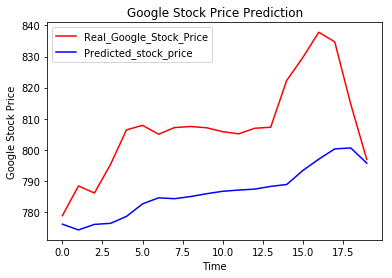

In [23]:
# Visualizing the results
plt.plot(real_set, color = 'red', label ='Real_Google_Stock_Price')
plt.plot(Predicted_stock_price, color = 'blue', label ='Predicted_stock_price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()